In [3]:
import geopandas as gpd
import pandas as pd

# Load datasets
strafford = gpd.read_file("Data/lclu-nh/strafford_combined.geojson")  # Adjust filename
rockingham = gpd.read_file("Data/lclu-nh/rockingham_combined.geojson")

In [15]:
# Define a function to calculate changes in impervious surfaces and wetlands
def calculate_land_cover_change(gdf, county_name):
    # Ensure the relevant columns exist
    if "Broad_Class" not in gdf.columns:
        raise ValueError("Broad_Class column is missing.")
    
    # Filter for impervious surfaces and wetlands
    impervious = gdf[gdf["Broad_Class"] == "Impervious Surfaces"]
    wetlands = gdf[gdf["Broad_Class"] == "Forested/Wetlands"]
    
    # Group by year and calculate total area
    impervious_area = impervious.groupby("Year")["AREA"].sum()
    wetlands_area = wetlands.groupby("Year")["AREA"].sum()
    
    # Combine into a DataFrame
    time_series = pd.DataFrame({
        "Year": impervious_area.index,
        "Impervious_Surface_Area": impervious_area.values,
        "Wetlands_Area": wetlands_area.values,
        "County": county_name
    })
    
    # Calculate changes between years
    time_series["Change_in_Impervious_Surface"] = time_series["Impervious_Surface_Area"].diff()
    time_series["Change_in_Wetlands"] = time_series["Wetlands_Area"].diff()
    
    return time_series

In [16]:
# Process each county
strafford_time_series = calculate_land_cover_change(strafford, "Strafford")
rockingham_time_series = calculate_land_cover_change(rockingham, "Rockingham")

# Combine time series data for both counties
combined_time_series = pd.concat([strafford_time_series, rockingham_time_series], ignore_index=True)

# Save to CSV
combined_time_series.to_csv("Data/land_cover_change_time_series.csv", index=False)

# Display the combined time series
print(combined_time_series)

   Year  Impervious_Surface_Area  Wetlands_Area      County  \
0  1962             6.259793e+08   8.207001e+09   Strafford   
1  1974             8.790419e+08   8.134225e+09   Strafford   
2  1998             1.369023e+09   7.815261e+09   Strafford   
3  1962             1.489376e+09   1.539497e+10  Rockingham   
4  1974             8.790419e+08   8.134225e+09  Rockingham   
5  1998             3.840443e+09   1.354670e+10  Rockingham   

   Change_in_Impervious_Surface  Change_in_Wetlands  
0                           NaN                 NaN  
1                  2.530626e+08       -7.277599e+07  
2                  4.899809e+08       -3.189640e+08  
3                           NaN                 NaN  
4                 -6.103342e+08       -7.260743e+09  
5                  2.961401e+09        5.412475e+09  


In [17]:
combined_time_series

,Year,Impervious_Surface_Area,Wetlands_Area,County,Change_in_Impervious_Surface,Change_in_Wetlands
0,1962,6.259793e+08,8.207001e+09,Strafford,NaN,NaN
1,1974,8.790419e+08,8.134225e+09,Strafford,2.530626e+08,-7.277599e+07
2,1998,1.369023e+09,7.815261e+09,Strafford,4.899809e+08,-3.189640e+08
3,1962,1.489376e+09,1.539497e+10,Rockingham,NaN,NaN
4,1974,8.790419e+08,8.134225e+09,Rockingham,-6.103342e+08,-7.260743e+09
5,1998,3.840443e+09,1.354670e+10,Rockingham,2.961401e+09,5.412475e+09


In [54]:
county_map = gpd.read_file("Data/counties/tl_2024_us_county.shp")

In [55]:
county_map

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103804462,12337139,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329782927,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1849796735,72079469,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333034781,8846149,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [81]:
straff_bound = county_map[county_map['NAMELSAD'] == 'Strafford County'].copy()
rock_bound = county_map[county_map['GEOIDFQ'] == '0500000US33015'].copy()

In [82]:
straff_bound.to_crs("EPSG:3857", inplace=True)
rock_bound.to_crs("EPSG:3857", inplace=True)

In [83]:
county_bounds = pd.concat([straff_bound, rock_bound])

In [84]:
county_bounds

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
3022,33,017,00873182,33017,0500000US33017,Strafford,Strafford County,06,H1,G4020,148,14460,40484,A,951724112,39173382,+43.2932725,-071.0355891,"POLYGON ((-7885747.271 5349260.527, -7885745.8..."
2019,33,015,00873181,33015,0500000US33015,Rockingham,Rockingham County,06,H1,G4020,148,14460,40484,A,1801152748,258528921,+42.9886636,-071.0990801,"POLYGON ((-7903402.208 5291361.246, -7903628.6..."


<Axes: >

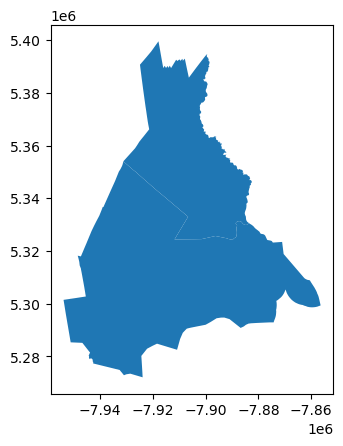

In [85]:
county_bounds.plot()

In [70]:
strafford.to_crs("EPSG:3857", inplace=True)
rockingham.to_crs("EPSG:3857", inplace=True)

In [75]:
import geopandas as gpd

def clip_and_recalculate_area(gdf, county_border_gdf):
    """
    Clips GeoDataFrames by county borders and recalculates area.
    
    Args:
        land_use_gdfs (list): List of GeoDataFrames for land use data.
        county_border_gdf (GeoDataFrame): GeoDataFrame of the county border.
        
    Returns:
        list: List of clipped GeoDataFrames with recalculated area.
    """
    
    clipped_gdfs = []
    
    clipped_gdf = gpd.clip(gdf, county_border_gdf)
        
    # Recalculate the area (assuming a projected CRS with meters as units)
    if clipped_gdf.crs.is_projected:
        clipped_gdf["AREA"] = clipped_gdf.geometry.area
    else:
        print("Warning: CRS is not projected. Area may not be in square meters.")
        clipped_gdf["AREA"] = clipped_gdf.geometry.area
        
        clipped_gdfs.append(clipped_gdf)
    
    return clipped_gdfs


In [86]:
# Example usage
strafford_clipped_gdfs = clip_and_recalculate_area(strafford, straff_bound)
rockingham_clipped_gdfs = clip_and_recalculate_area(rockingham, rock_bound)


In [88]:
strafford_clipped_gdfs

[]

In [89]:
straff_clip = gpd.clip(strafford, straff_bound)

In [92]:
straff_clip

,AREA,PERIMETER,GRANITID,LU,Land_Use_Desc,Broad_Class,Year,geometry
11101,2.491360e+04,865.829268,1711102,40,Forested,Forested/Wetlands,1962,"POLYGON ((-7911794.544 5324443.516, -7911743.7..."
37082,2.859410e+04,836.368296,1714274,50,Water,Other,1998,"POLYGON ((-7910910.427 5324418.651, -7910898.6..."
37081,1.598686e+04,534.690402,1714273,11,Residential,Impervious Surfaces,1998,"POLYGON ((-7911532.733 5324489.534, -7911537.3..."
11100,6.952690e+03,381.695898,1711101,70,Idle/other open,Other,1962,"POLYGON ((-7908105.837 5324443.170, -7908096.8..."
11099,2.378793e+04,704.956848,1711100,70,Idle/other open,Other,1962,"POLYGON ((-7909981.199 5324427.136, -7909991.5..."
...,...,...,...,...,...,...,...,...
3,1.187903e+06,10679.149304,1700004,40,Forested,Forested/Wetlands,1962,"POLYGON ((-7918335.651 5398972.411, -7918342.9..."
4,4.827559e+05,5517.817291,1700005,70,Idle/other open,Other,1962,"POLYGON ((-7918311.029 5398293.148, -7918319.3..."
22812,3.568844e+04,1037.791227,1700004,70,Idle/other open,Other,1998,"POLYGON ((-7918388.778 5398896.440, -7918384.1..."
11105,1.528781e+04,586.265814,1700004,70,Idle/other open,Other,1974,"POLYGON ((-7918389.106 5398895.972, -7918378.7..."


In [94]:
rockingham_clip = gpd.clip(rockingham, rock_bound)

In [98]:
straff_clip["AREA"] = straff_clip.geometry.area
rockingham_clip['AREA'] = rockingham_clip.geometry.area

In [99]:
# Process each county
strafford_time_series = calculate_land_cover_change(straff_clip, "Strafford")
rockingham_time_series = calculate_land_cover_change(rockingham_clip, "Rockingham")

# Combine time series data for both counties
combined_time_series = pd.concat([strafford_time_series, rockingham_time_series], ignore_index=True)

# Save to CSV
combined_time_series.to_csv("Data/land_cover_change_time_series.csv", index=False)

# Display the combined time series
print(combined_time_series)

   Year  Impervious_Surface_Area  Wetlands_Area      County  \
0  1962             1.097133e+08   1.440518e+09   Strafford   
1  1974             1.540588e+08   1.427773e+09   Strafford   
2  1998             2.399409e+08   1.371808e+09   Strafford   
3  1962             2.584565e+08   2.674384e+09  Rockingham   
4  1974             1.751461e+02   7.366226e+03  Rockingham   
5  1998             6.661394e+08   2.353924e+09  Rockingham   

   Change_in_Impervious_Surface  Change_in_Wetlands  
0                           NaN                 NaN  
1                  4.434552e+07       -1.274485e+07  
2                  8.588210e+07       -5.596555e+07  
3                           NaN                 NaN  
4                 -2.584563e+08       -2.674377e+09  
5                  6.661392e+08        2.353916e+09  


In [100]:
combined_time_series

,Year,Impervious_Surface_Area,Wetlands_Area,County,Change_in_Impervious_Surface,Change_in_Wetlands
0,1962,1.097133e+08,1.440518e+09,Strafford,NaN,NaN
1,1974,1.540588e+08,1.427773e+09,Strafford,4.434552e+07,-1.274485e+07
2,1998,2.399409e+08,1.371808e+09,Strafford,8.588210e+07,-5.596555e+07
3,1962,2.584565e+08,2.674384e+09,Rockingham,NaN,NaN
4,1974,1.751461e+02,7.366226e+03,Rockingham,-2.584563e+08,-2.674377e+09
5,1998,6.661394e+08,2.353924e+09,Rockingham,6.661392e+08,2.353916e+09


In [103]:
strafford_time_series.to_csv("Data/time-series/strafford.csv", index=False)
rockingham_time_series.to_csv("Data/time-series/rockingham.csv", index=False)

In [104]:
combined_time_series.to_csv("Data/time-series/combined_time_series.csv", index=False)

In [106]:
straff_bound.to_file("Data/counties/strafford.gpkg", driver='GPKG')
rock_bound.to_file("Data/counties/rockingham.gpkg", driver='GPKG')